In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_country = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/countries.csv")
df_currency = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/currency_details.csv")
df_trans = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/transactions.csv")
df_users = pd.read_csv("C:/Users/jaadt/Downloads/ML tasks/datasets/users.csv")


In [8]:
df_users.sample()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
3807,cca93140-a402-435e-9c2c-981072846510,1,CH,False,2018-05-25,2017-03-05 21:00:28.534000,ACTIVE,ES,1982,PASSED,0


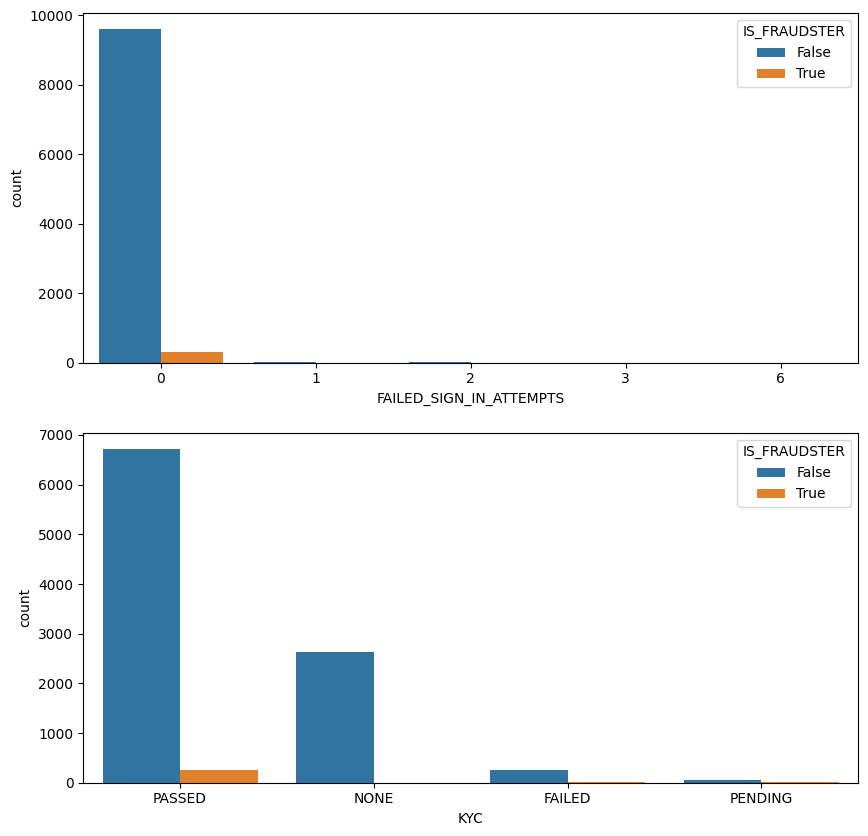

In [56]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.countplot(data= df_users, x= 'KYC',hue= 'IS_FRAUDSTER')

plt.subplot(2,1,1)

sns.countplot(data= df_users, x= 'FAILED_SIGN_IN_ATTEMPTS',hue= 'IS_FRAUDSTER')
plt.subplot(2,1,2)

plt.show()

In [12]:
df_currency.sample(10)

,CCY,EXPONENT,IS_CRYPTO
141,SLL,2,False
79,JOD,3,False
23,BTN,2,False
15,BIF,0,False
21,BSD,2,False
130,RSD,2,False
133,RWF,0,False
19,BOV,2,False
25,BYN,2,False
49,ERN,2,False


In [36]:
df_trans.sample(5)

,CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID,AMOUNT_USD
255568,GBP,1542,COMPLETED,2018-05-30 19:16:33.516,NaN,USA,mags,0775525b-c2a3-469b-a09f-a6b94db3f155,CARD_PAYMENT,GAIA,72cbd28f-3dde-4191-b609-b6ece034a11c,1133.0
567274,GBP,4862,COMPLETED,2017-06-23 02:35:21.561,NaN,USA,mags,2769daf8-bac7-44df-a57e-c2cae445f5b7,CARD_PAYMENT,GAIA,497130da-49e1-4233-af70-04c16215dbde,3630.0
300016,GBP,1726,COMPLETED,2018-06-16 10:48:28.271,NaN,HKG,chip,d4dcfe5c-b42c-470d-9889-ff0f10a4feb8,CARD_PAYMENT,GAIA,b7cfda29-6ff3-4e5a-8a0f-b14b22e232c1,1305.0
347657,GBP,960,COMPLETED,2018-07-03 08:19:55.118,museum,HRV,cont,45f0966f-f5ab-4593-8663-648347df1739,CARD_PAYMENT,GAIA,4b69d9f8-ff73-48da-883d-089d247878c0,721.0
483800,EUR,15000,COMPLETED,2016-10-14 21:13:09.376,bank,DEU,chip,ea86c877-ff87-4caa-8b76-3a05b89850d1,ATM,GAIA,95a8965c-9e56-48bd-a2c1-f6c3caf2c03f,12687.0


In [37]:
df_country.sample(15)

,CODE,NAME,CODE3,NUMCODE,PHONECODE
114,LT,Lithuania,lTU,440,370
130,MD,"Moldova, Republic Of",mDA,498,373
83,GY,Guyana,GUY,328,592
7,AR,Argentina,ARG,32,54
209,UA,Ukraine,uKR,804,380
210,AE,United Arab Emirates,aRE,784,971
29,BF,Burkina Faso,BFA,854,226
72,DE,Germany,DEU,276,49
138,NR,Nauru,nRU,520,674
203,TN,Tunisia,tUN,788,216


In [66]:
new_df =  pd.merge(df_users, df_trans, left_on='ID', right_on='USER_ID', how='inner')
new_df = pd.merge(new_df,df_country,left_on='COUNTRY',right_on='CODE',how='inner').drop(columns= 'ID_x')
new_df.sample(5)

,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE_x,STATE_x,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS,...,USER_ID,TYPE,SOURCE,ID_y,AMOUNT_USD,CODE,NAME,CODE3,NUMCODE,PHONECODE
250871,1,KR,False,2018-05-25,2016-12-27 15:38:18.549000,ACTIVE,GB,1994,PASSED,0,...,7827201f-f7d4-4239-8206-f999ace6c11a,TOPUP,HERA,be1ec7bb-bc2d-40ca-ab7e-beb5d5980fd5,739.0,GB,United Kingdom,gBR,826,44
153634,1,CH,False,2018-09-20,2016-01-23 05:52:39.350000,ACTIVE,GB,1977,PASSED,0,...,3dd8b1a9-17a7-483f-b1a4-9f23fe55ad61,CARD_PAYMENT,GAIA,ea6d742f-87a6-456b-bb56-19a645a92755,721.0,GB,United Kingdom,gBR,826,44
219234,1,GB||JE||IM||GG,False,2018-09-20,2017-10-30 13:31:28.224000,ACTIVE,GB,1984,PASSED,0,...,057ec476-699f-4688-a3b0-84a2f9ee5caa,CARD_PAYMENT,GAIA,72cbb24a-6dd5-4dee-95c9-a49555e3fa60,558.0,GB,United Kingdom,gBR,826,44
228164,1,LV,False,2018-05-25,2016-09-16 11:33:59.390000,ACTIVE,LV,1975,PASSED,0,...,c4301486-1e88-4d7f-a5f6-68f1e24f6403,CARD_PAYMENT,GAIA,09b142d8-693a-4048-80e4-9ef822ccf6c7,397.0,LV,Latvia,lVA,428,371
278311,1,IE,False,2018-09-20,2017-07-17 20:11:22.790000,ACTIVE,IE,1986,PASSED,0,...,2acec8d3-6927-4428-99bb-a8d3edc9af61,P2P,INTERNAL,9baa67fc-22b9-4be7-b493-f784a38a40e4,85.0,IE,Ireland,iRL,372,353


<Axes: xlabel='COUNTRY', ylabel='count'>

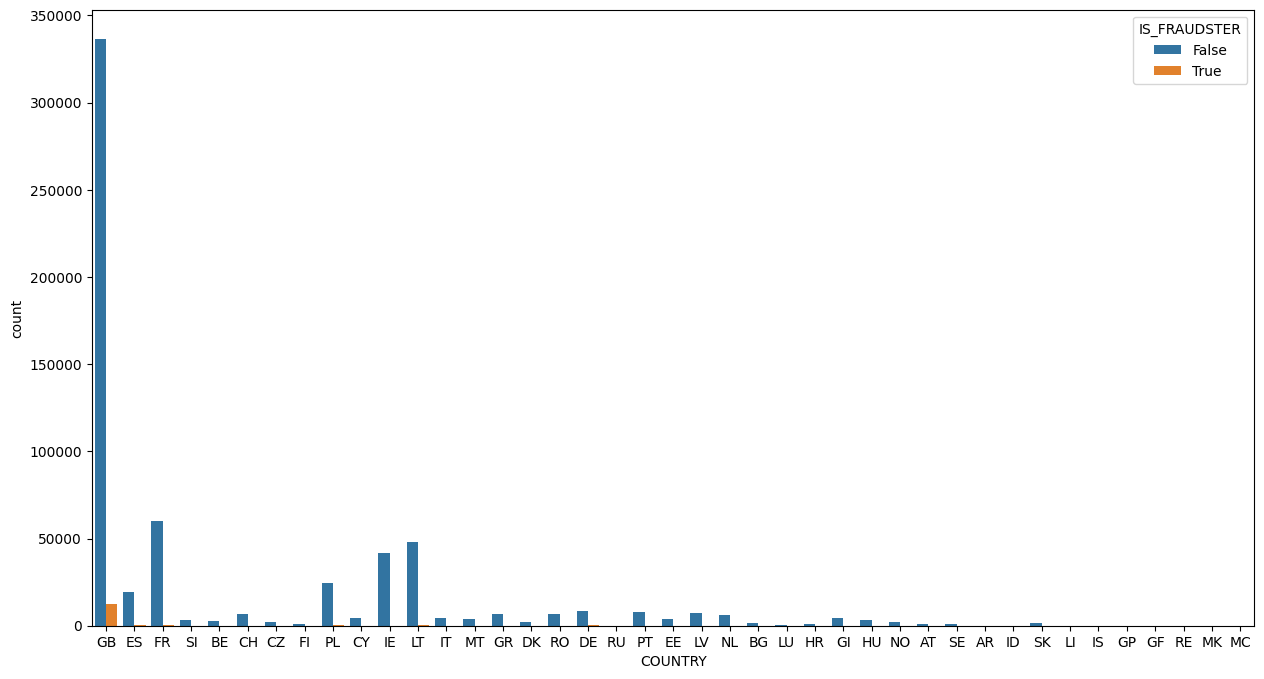

In [47]:
plt.figure(figsize=(15, 8))  # Make the plot wider and taller
sns.countplot(data=new_df,x='COUNTRY',hue='IS_FRAUDSTER')

In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638347 entries, 0 to 638346
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   HAS_EMAIL                638347 non-null  int64  
 1   PHONE_COUNTRY            638347 non-null  object 
 2   IS_FRAUDSTER             638347 non-null  bool   
 3   TERMS_VERSION            612689 non-null  object 
 4   CREATED_DATE_x           638347 non-null  object 
 5   STATE_x                  638347 non-null  object 
 6   COUNTRY                  638347 non-null  object 
 7   BIRTH_YEAR               638347 non-null  int64  
 8   KYC                      638347 non-null  object 
 9   FAILED_SIGN_IN_ATTEMPTS  638347 non-null  int64  
 10  CURRENCY                 638347 non-null  object 
 11  AMOUNT                   638347 non-null  int64  
 12  STATE_y                  638347 non-null  object 
 13  CREATED_DATE_y           638347 non-null  object 
 14  MERC

In [67]:
new_df['IS_FRAUDSTER'] = new_df['IS_FRAUDSTER'].astype(int)
new_df['TERMS'] = (pd.to_datetime(new_df['TERMS_VERSION'])-pd.to_datetime(new_df['CREATED_DATE_x'])).dt.seconds
new_df['KYC'] = new_df['KYC'].replace({'PASSED': 1, 'FAILED': 0, 'NONE': -1, 'PENDING': -2})
new_dfc = pd.get_dummies(data= new_df['TYPE']).astype(int)
new_df = pd.concat([new_df, new_dfc], axis=1)


C:\Users\jaadt\AppData\Local\Temp\ipykernel_21332\3748528115.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['KYC'] = new_df['KYC'].replace({'PASSED': 1, 'FAILED': 0, 'NONE': -1, 'PENDING': -2})


<Axes: >

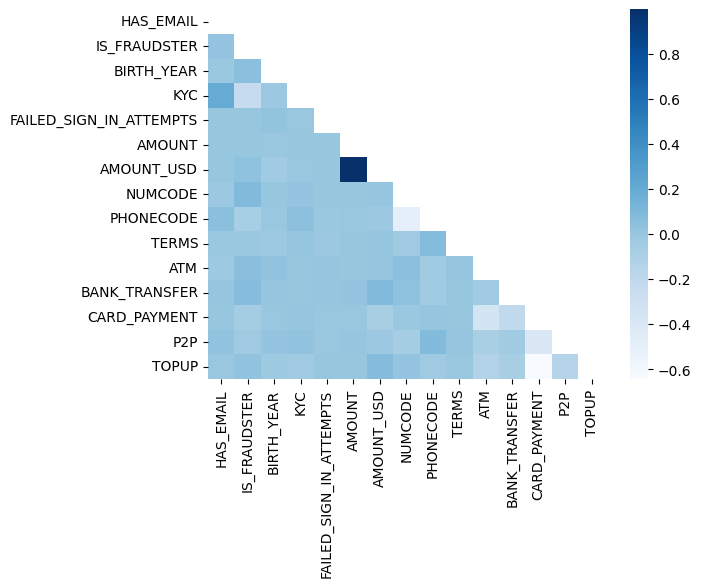

In [70]:
cor = new_df.select_dtypes('number').corr()
matrix = np.triu(cor)
sns.heatmap(data=cor,cmap="Blues", mask=matrix)


In [61]:
new_df['KYC'].sample(4)

457596   NaN
435823   NaN
240889   NaN
438498   NaN
Name: KYC, dtype: float64

<Figure size 1500x800 with 0 Axes>

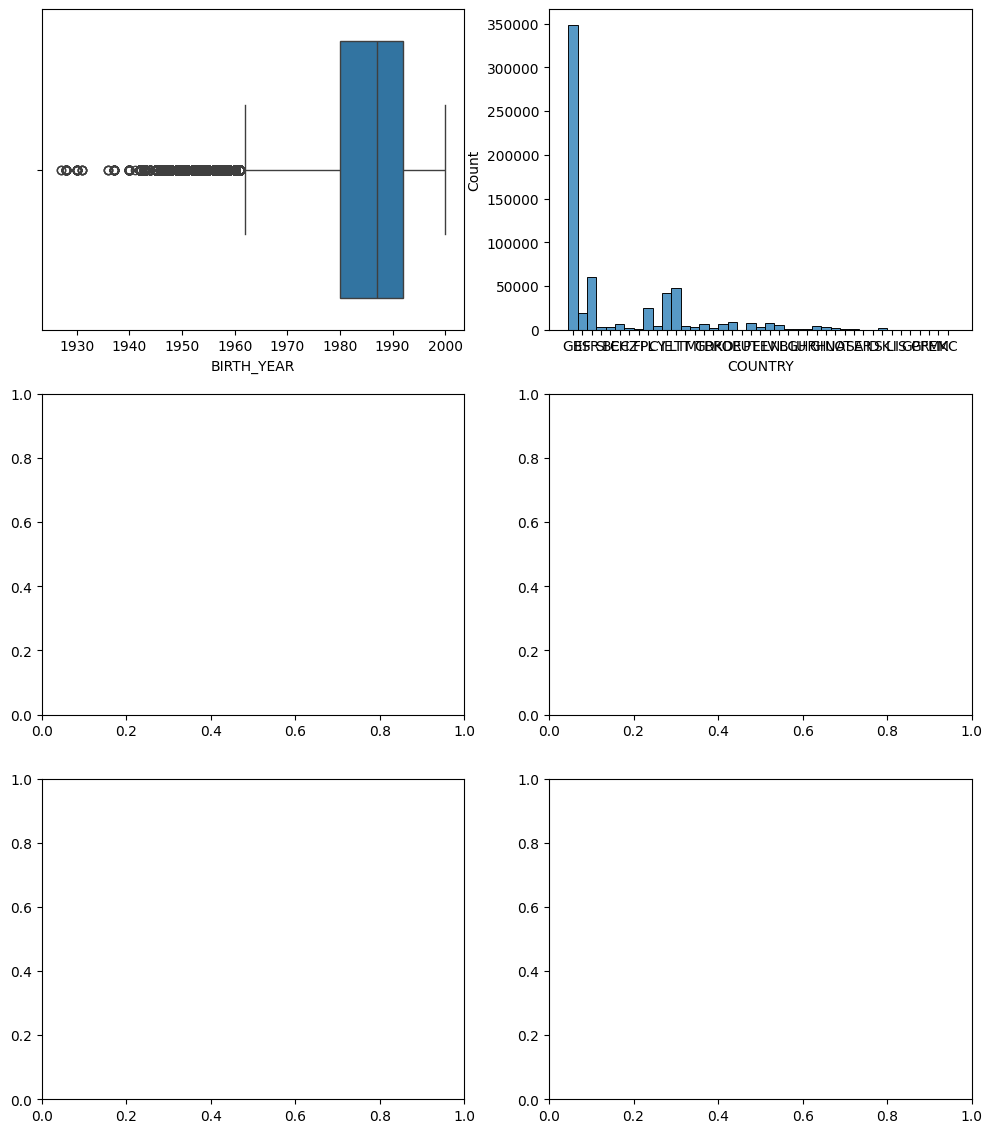

In [76]:
plt.figure(figsize=(15, 8))  # Make the plot wider and taller

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)
aerofit_df = new_df.copy()
sns.boxplot(data=aerofit_df, x="BIRTH_YEAR", ax=axis[0,0])
sns.histplot(data=aerofit_df, x="COUNTRY", ax=axis[0,1])
plt.show()